# Brian Bozzer Final Project

"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work." 

## Business Understanding

In this instance I was asked to develop a Model that would predict which season ticket holders that were not going to come back next year. This is important becasue if you can predict which fans aren't planning on returning you can target those particular fans with deals and marketing strategies in order to get them to come back and spend money at the stadium. Models like the one I am going to build can be used to predict many outcomes in the business environment. 

## Uploading Python Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from scipy import stats

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.neural_network import MLPClassifier


#ensemble classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

C:\Users\brian\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Data Processing and Cleaning


In [2]:
df=pd.read_excel("train_test_dataset.xlsx")

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null object
INCOME      9216 non-null object
CHILD       4549 non-null object
GNDR        9216 non-null object
OWNHOME     9216 non-null object
SPORT       4273 non-null float64
COMP        9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(1), int64(11), object(7)
memory usage: 1.3+ MB


,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


In [4]:
df = df.drop('CHILD', axis=1)
df = df.drop('SPORT', axis=1) ## Droping Columns with Many missing Values

In [5]:
df['GAMES_ATT.'] = df['Y1G5'] + df['Y1G4'] + df['Y1G3'] +df['Y1G2']+ df['Y1G1'] ## Turning Games attended into one own Columns

In [6]:
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,COMP,PCTMARR,HOMEVAL,GAMES_ATT.
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,0,1,,77,203,3
1,298S54OK,1,0,0,1,0,1,15,3,1,,,0,0,1,53,68,2
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,0,1,,50,38,2
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,1,1,1,60,68,3
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,1,1,,65,194,1


In [7]:
df = df.drop('Y1G5', axis=1)
df = df.drop('Y1G4', axis=1)
df = df.drop('Y1G3', axis=1)
df = df.drop('Y1G2', axis=1)
df = df.drop('Y1G1', axis=1) ## Droping Games attendance because I Made a colums with all of them

In [8]:
df = df.replace(' ', np.nan)
## Replacing Blanks with NAN

In [9]:
df['AGE'] = df['AGE'].astype(float)

In [10]:
df.head()

,FAKEID,Y2defect,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,COMP,PCTMARR,HOMEVAL,GAMES_ATT.
0,580V74KT,0,15,8,1,94.0,4.0,0.0,1.0,NaN,77,203,3
1,298S54OK,1,15,3,1,NaN,NaN,0.0,0.0,1.0,53,68,2
2,268D25AO,1,15,11,1,67.0,2.0,0.0,1.0,NaN,50,38,2
3,312Q12WV,1,15,4,0,62.0,4.0,1.0,1.0,1.0,60,68,3
4,420R23VB,0,15,5,0,89.0,4.0,1.0,1.0,NaN,65,194,1


In [11]:
df['AGE'].mean()

61.39291153260418

In [12]:
df = df.fillna({'AGE': 61}) ## filling missing age Values with average age

In [13]:
df = df.fillna({'COMP': 0}) ## filling missing values with Zero

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 13 columns):
FAKEID        9216 non-null object
Y2defect      9216 non-null int64
Y1price       9216 non-null int64
YEARS         9216 non-null int64
BACKER        9216 non-null int64
AGE           9216 non-null float64
INCOME        7272 non-null float64
GNDR          8718 non-null float64
OWNHOME       7217 non-null float64
COMP          9216 non-null float64
PCTMARR       9216 non-null int64
HOMEVAL       9216 non-null int64
GAMES_ATT.    9216 non-null int64
dtypes: float64(5), int64(7), object(1)
memory usage: 936.1+ KB


In [15]:
df['INCOME'].mean() 

2.882150715071507

In [16]:
df = df.fillna({'INCOME': 3}) ## Filling Missing Values with mean value

## Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000019C1BB00>,
      dtype=object)

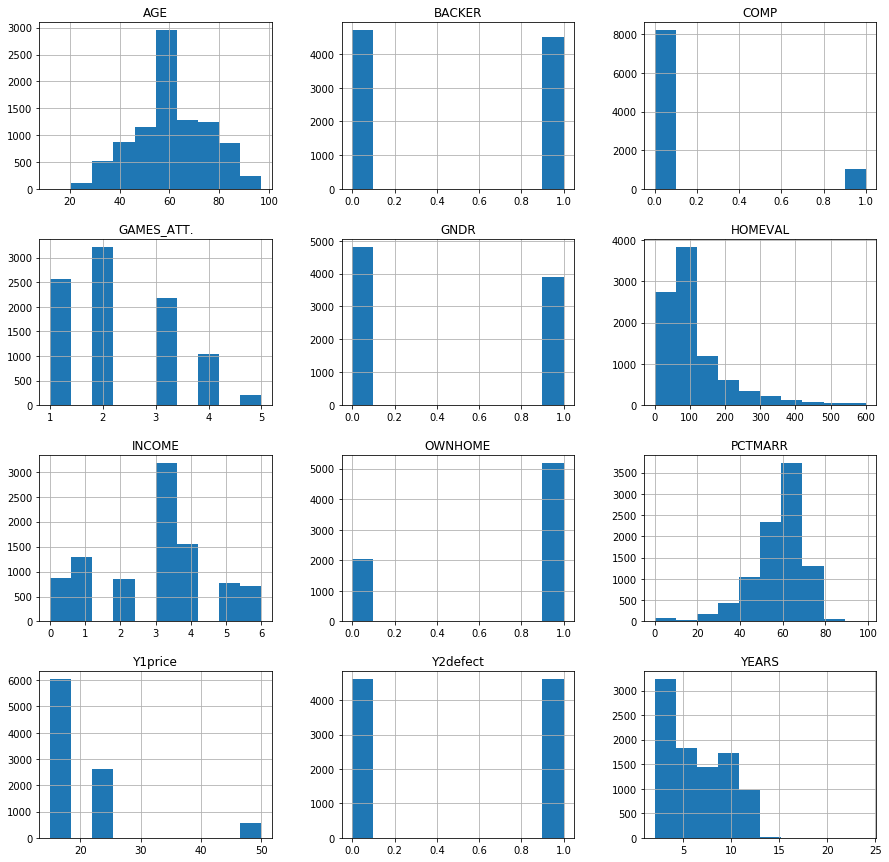

In [17]:
df.hist(figsize=(15,15)) ## Getting a General Idea About What the DATA looks like

Y2defect
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

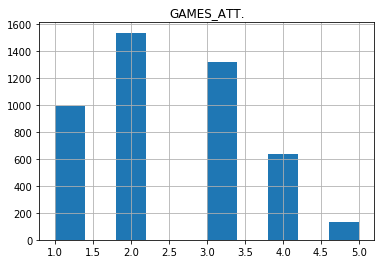

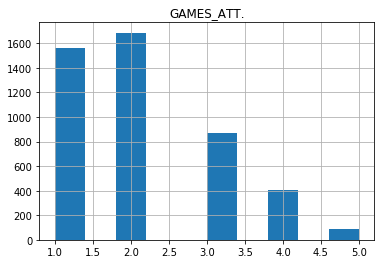

In [18]:
df.groupby('Y2defect').hist('GAMES_ATT.') ## looking at defectors by GAMES ATTENDED

Y2defect
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

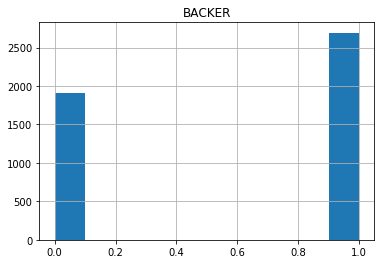

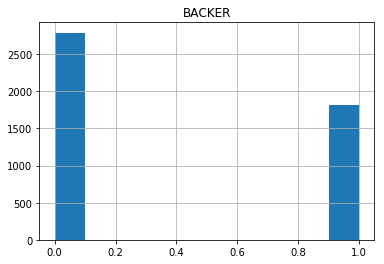

In [19]:
df.groupby('Y2defect').hist('BACKER') ## Looking at how the Backers affect the Defectors

In [20]:
df.groupby(['Y2defect', 'AGE']).count() ## pivot table for Defect and Age

FAKEID  Y1price  YEARS  BACKER  INCOME  GNDR  OWNHOME  COMP  \
Y2defect AGE                                                                 
0        12.0       1        1      1       1       1     1        1     1   
         19.0       1        1      1       1       1     1        1     1   
         21.0       2        2      2       2       2     2        0     2   
         23.0       4        4      4       4       4     4        4     4   
         24.0       1        1      1       1       1     1        1     1   
         25.0      12       12     12      12      12    11        8    12   
         26.0       6        6      6       6       6     5        6     6   
         27.0      14       14     14      14      14    14        7    14   
         28.0      12       12     12      12      12    12       10    12   
         29.0      24       24     24      24      24    24       20    24   
         30.0      12       12     12      12      12    12       11    12   
         31.0      29       29     29      29      29    28       23    29   
         32.0      15       15     15      15      15    14       13    15   
         33.0      34       34     34      34      34    33       28    34   
         34.0      20       20     20      20      20    20       16    20   
         35.0      38       38     38      38      38    36       33    38   
         36.0      34       34     34      34      34    31       27    34   
         37.0      52       52     52      52      52    50       41    52   
         38.0      29       29     29      29      29    29       26    29   
         39.0      48       48     48      48      48    47       38    48   
         40.0      51       51     51      51      51    48       42    51   
         41.0      63       63     63      63      63    63       51    63   
         42.0      35       35     35      35      35    35       31    35   
         43.0      78       78     78      78      78    75       59    78   
         44.0      51       51     51      51      51    47       40    51   
         45.0      63       63     63      63      63    63       52    63   
         46.0      32       32     32      32      32    29       26    32   
         47.0      69       69     69      69      69    68       58    69   
         48.0      60       60     60      60      60    59       50    60   
         49.0      83       83     83      83      83    82       69    83   
...               ...      ...    ...     ...     ...   ...      ...   ...   
1        68.0      56       56     56      56      56    53       43    56   
         69.0      87       87     87      87      87    82       66    87   
         70.0      60       60     60      60      60    56       49    60   
         71.0      96       96     96      96      96    93       75    96   
         72.0      62       62     62      62      62    61       52    62   
         73.0      82       82     82      82      82    82       64    82   
         74.0      70       70     70      70      70    68       53    70   
         75.0      87       87     87      87      87    85       72    87   
         76.0      72       72     72      72      72    70       56    72   
         77.0      94       94     94      94      94    89       74    94   
         78.0      54       54     54      54      54    50       42    54   
         79.0      80       80     80      80      80    76       61    80   
         80.0      53       53     53      53      53    51       42    53   
         81.0      83       83     83      83      83    80       55    83   
         82.0      64       64     64      64      64    60       43    64   
         83.0      46       46     46      46      46    46       35    46   
         84.0      49       49     49      49      49    46       30    49   
         85.0      58       58     58      58      58    58       44    58   
         86.0      19       19     19

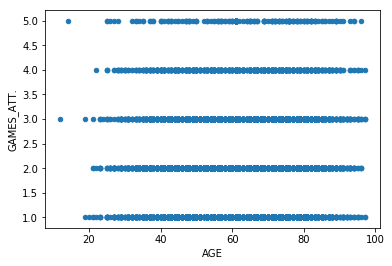

In [21]:
df.plot(kind='scatter',x='AGE',y='GAMES_ATT.') ## Scatter Plot for games attended and AGE

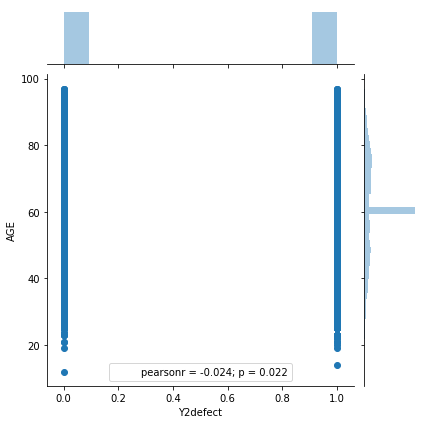

In [22]:
sns.jointplot("Y2defect", "AGE", df,)

## Exploratory Data Analysis

In [23]:
df.describe() ## Basic Stats

,Y2defect,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,COMP,PCTMARR,HOMEVAL,GAMES_ATT.
count,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,8718.000000,7217.000000,9216.000000,9216.000000,9216.000000,9216.000000
mean,0.500000,19.963108,6.378038,0.489475,61.307943,2.907010,0.447236,0.718581,0.109484,58.228516,112.111220,2.255642
std,0.500027,8.820188,2.873927,0.499916,14.691902,1.638565,0.497237,0.449722,0.312262,12.902173,92.292223,1.054032
min,0.000000,15.000000,2.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,15.000000,4.000000,0.000000,51.000000,2.000000,0.000000,0.000000,0.000000,52.000000,56.000000,1.000000
50%,0.500000,15.000000,6.000000,0.000000,61.000000,3.000000,0.000000,1.000000,0.000000,61.000000,81.000000,2.000000
75%,1.000000,25.000000,9.000000,1.000000,72.000000,4.000000,1.000000,1.000000,0.000000,67.000000,132.000000,3.000000
max,1.000000,50.000000,24.000000,1.000000,97.000000,6.000000,1.000000,1.000000,1.000000,99.000000,600.000000,5.000000


In [24]:
df.corr() ## Correlation plot

,Y2defect,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,COMP,PCTMARR,HOMEVAL,GAMES_ATT.
Y2defect,1.000000,-0.023498,-0.139099,-0.189929,-0.023916,0.010530,0.008438,-0.022388,0.019113,-0.023869,0.029722,-0.164720
Y1price,-0.023498,1.000000,0.043768,-0.090287,-0.028649,0.071470,0.045249,-0.018029,0.012499,0.008032,0.095580,0.022259
YEARS,-0.139099,0.043768,1.000000,0.533836,0.286248,-0.089712,-0.013408,-0.011307,-0.076235,0.023691,-0.049689,0.217106
BACKER,-0.189929,-0.090287,0.533836,1.000000,0.184036,-0.084987,-0.024022,-0.018135,-0.045798,0.032558,-0.064727,0.220321
AGE,-0.023916,-0.028649,0.286248,0.184036,1.000000,-0.214986,0.019656,-0.065713,-0.177092,-0.050937,-0.014367,0.055672
INCOME,0.010530,0.071470,-0.089712,-0.084987,-0.214986,1.000000,0.064964,0.080299,0.158183,0.132232,0.272878,-0.006969
GNDR,0.008438,0.045249,-0.013408,-0.024022,0.019656,0.064964,1.000000,0.075907,0.045932,0.053926,0.022454,-0.020839
OWNHOME,-0.022388,-0.018029,-0.011307,-0.018135,-0.065713,0.080299,0.075907,1.000000,0.164585,0.100576,-0.029668,0.013050
COMP,0.019113,0.012499,-0.076235,-0.045798,-0.177092,0.158183,0.045932,0.164585,1.000000,0.054610,0.066795,-0.021083
PCTMARR,-0.023869,0.008032,0.023691,0.032558,-0.050937,0.132232,0.053926,0.100576,0.054610,1.000000,0.046570,0.021239


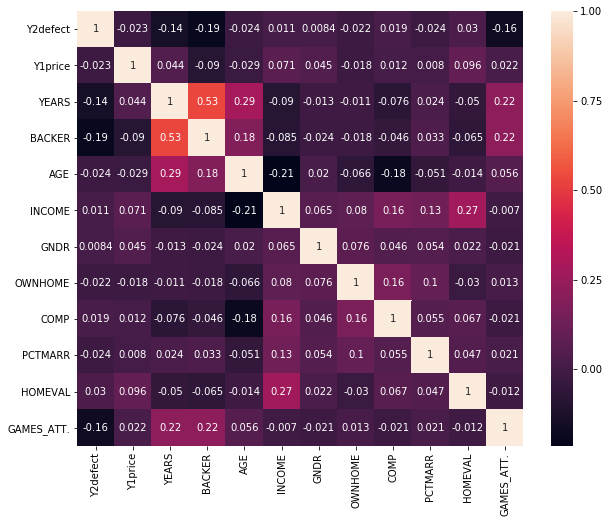

In [65]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True) ## heatmap to show Correlation

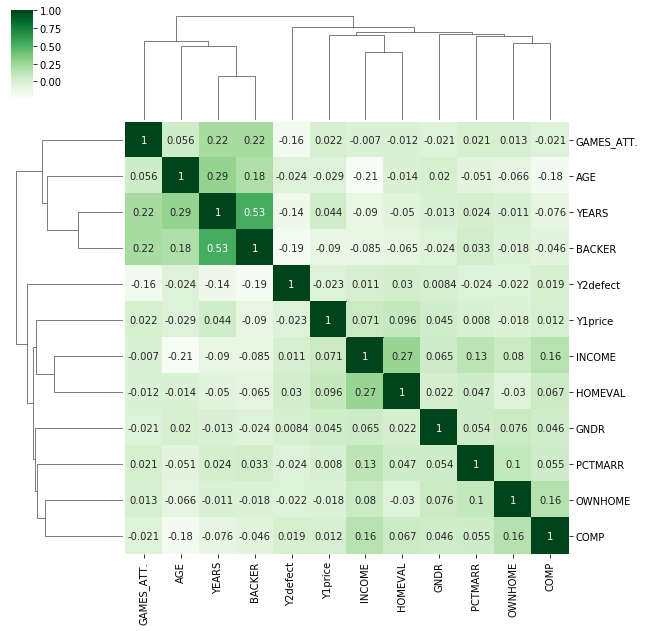

In [26]:
plt.figure(figsize=(5,5))
sns.clustermap(data=df.corr(), annot=True, cmap='Greens') ## Clustermap of variables

## Statistical Testing

### Here I do some Statistical testing to try to understand what variables have an effect on people defecting

In [27]:
backer_high = df[df['BACKER'] == 1]['Y2defect']
backer_low = df[df['BACKER'] == 0 ]['Y2defect']


stats.ttest_ind(backer_high, backer_low)

## The p value is close to 0 so it is statistcally significant

Ttest_indResult(statistic=-18.569229464586954, pvalue=1.3520712382655212e-75)

In [28]:
numberofgames_high = df[df['GAMES_ATT.'] >= 3]['Y2defect']
numberofgames_low = df[df['GAMES_ATT.'] < 3 ]['Y2defect']


stats.ttest_ind(numberofgames_high, numberofgames_low)

## The p value is close to 0 so it is statistcally significant

Ttest_indResult(statistic=-15.666216438852006, pvalue=1.2996818700984786e-54)

In [29]:
years_high = df[df['YEARS'] >= 6]['Y2defect']
years_low = df[df['YEARS']  < 6 ]['Y2defect']


stats.ttest_ind(years_high, years_low)

## the P value is close to 0 so it is statistcally significant

Ttest_indResult(statistic=-13.688019051084693, pvalue=3.095217807948055e-42)

## Model Development

### Decsion Tree

In [34]:
df3=df

In [35]:
y = df3['Y2defect']
X = df3.drop(['Y2defect','AGE', 'INCOME', 'GNDR', 'OWNHOME','FAKEID', 'COMP' ], axis=1)
## Deciding what Variables I want to include

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.5594936708860759
--------------------------------------------------------
[[763 600]
 [618 784]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.55      0.56      0.56      1363
          1       0.57      0.56      0.56      1402

avg / total       0.56      0.56      0.56      2765

--------------------------------------------------------
0.5594978560132627


### Model Building KNN

In [38]:
y = df3['Y2defect']
X = df3.drop(['Y2defect','AGE', 'INCOME', 'GNDR', 'OWNHOME','FAKEID', 'COMP' ], axis=1)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier()   
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [40]:
print metrics.accuracy_score(y_test, knn.predict(X_test))
print metrics.confusion_matrix(y_test, knn.predict(X_test))
print metrics.classification_report(y_test, knn.predict(X_test))
print metrics.roc_auc_score(y_test, knn.predict(X_test))

0.5204339963833635
[[745 618]
 [708 694]]
             precision    recall  f1-score   support

          0       0.51      0.55      0.53      1363
          1       0.53      0.50      0.51      1402

avg / total       0.52      0.52      0.52      2765

0.5207977702956578


### Feature Selection

In [46]:
X_new = SelectKBest(chi2, k=3).fit_transform(X, y)
print X_new

[[  8   1 203]
 [  3   1  68]
 [ 11   1  38]
 ...
 [  6   0  95]
 [  7   1  37]
 [  7   1 344]]


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)

dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

#Model evaluation
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.5471971066907776
--------------------------------------------------------
[[836 527]
 [725 677]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.54      0.61      0.57      1363
          1       0.56      0.48      0.52      1402

avg / total       0.55      0.55      0.55      2765

--------------------------------------------------------
0.548117247868311


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)


print metrics.accuracy_score(y_test, lr.predict(X_test))
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print metrics.classification_report(y_test, lr.predict(X_test))
print metrics.roc_auc_score(y_test, lr.predict(X_test))

0.5902350813743219
[[792 571]
 [562 840]]
             precision    recall  f1-score   support

          0       0.58      0.58      0.58      1363
          1       0.60      0.60      0.60      1402

avg / total       0.59      0.59      0.59      2765

0.5901076232151323


In [49]:
model_extra = ExtraTreesClassifier()
model_extra.fit(X, y)
print model_extra.score(X, y)

# display the relative importance of each attribute
print(model_extra.feature_importances_)

0.9929470486111112
[0.02107575 0.1297295  0.03672444 0.32905634 0.43601337 0.04740061]


In [50]:
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), model_extra.feature_importances_), X.columns))

Features sorted by their rank:
[(0.0211, u'Y1price'), (0.0367, u'BACKER'), (0.0474, 'GAMES_ATT.'), (0.1297, u'YEARS'), (0.3291, u'PCTMARR'), (0.436, u'HOMEVAL')]


### Random Forest

In [61]:
y = df['Y2defect']
x = df.drop(['Y2defect','AGE', 'INCOME', 'GNDR', 'OWNHOME','FAKEID', 'COMP','Y1price', 'BACKER' ], axis=1)

In [62]:


clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(x, y)
clf.score(x,y)

0.9769965277777778

In [63]:
print metrics.accuracy_score(y, clf.predict(x)) 
print metrics.confusion_matrix(y, clf.predict(x))
print metrics.classification_report(y, clf.predict(x))
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.9769965277777778
[[4501  107]
 [ 105 4503]]
             precision    recall  f1-score   support

          0       0.98      0.98      0.98      4608
          1       0.98      0.98      0.98      4608

avg / total       0.98      0.98      0.98      9216

0.548117247868311


In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 13 columns):
FAKEID        9216 non-null object
Y2defect      9216 non-null int64
Y1price       9216 non-null int64
YEARS         9216 non-null int64
BACKER        9216 non-null int64
AGE           9216 non-null float64
INCOME        9216 non-null float64
GNDR          8718 non-null float64
OWNHOME       7217 non-null float64
COMP          9216 non-null float64
PCTMARR       9216 non-null int64
HOMEVAL       9216 non-null int64
GAMES_ATT.    9216 non-null int64
dtypes: float64(5), int64(7), object(1)
memory usage: 936.1+ KB


## Model Selection

For my model selection I am going to choose my Random Forest while the auc score was 54% the accuracy score was 97% so I belive that to be the best model for evaulating season ticket defaulters. 

I ran a number of models including logistical regression, Decsion tree, and KNN and I seemed to have gotten the best results with random forest.

## Final Analysis and Story Telling 

When performing this asignment it was interesting to find out that major variables in determing whether or not someone will
return are Homeval, PCTMARR, And Years. When I first started I thought that the games attended in the previous year would be the 
most effective and important variables when it came to model building. Ultimatly I went with random forest because of the high 
Accuracy score while the AUC score was on par with the other models I felt that random forest is the most powerful and would 
ultimatly be the most effective model when analyizing this data. Overall I am happy with the results whereas I would have liked
to get a higher AUC score sometimes thing just don't happen the way you want them too. Ultimatly some business applications that 
can use these models would be to use them for finding which customers who are more likely to not return therefore you can focus 
the marketing dollars on those indivudals. This maybe offering discounts, special promotional fliers, calling them asking about 
their season ticket expirence, and ultimatly if they aren't returning for the following year ask Why? Figure out what is turning 
People away so that managerial decsions can be made to change the way things are opperated to keep the most amount of people as 
possible and ultimatly return the highest possible profit. 

## Model Deployment & Prepare Entry Data

In [403]:
df2 = pd.read_excel("validation_dataset.xlsx")
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,0,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,NaN,1,1,0.0,,65,110


In [404]:
df2['GAMES_ATT.'] = df2['Y2G5'] + df2['Y2G4'] + df2['Y2G3'] +df2['Y2G2']+ df2['Y2G1']

In [405]:
df2 = df2.drop('Y2G5', axis=1)
df2 = df2.drop('Y2G4', axis=1)
df2 = df2.drop('Y2G3', axis=1)
df2 = df2.drop('Y2G2', axis=1)
df2 = df2.drop('Y2G1', axis=1)

In [406]:
df2 = df2.drop('CHILD', axis=1)

In [407]:
df2 = df2.drop('SPORT', axis=1)

In [408]:
df2.head()

,FAKEID,Y3defect,Y2price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,COMP,PCTMARR,HOMEVAL,GAMES_ATT.
0,580D24RR,NaN,15,5,0,49.0,4,0,1,,66,64,2
1,179Q96NO,NaN,25,9,1,84.0,5,0,,,67,128,5
2,050Z45TB,NaN,15,5,1,NaN,,0,0,1,52,113,3
3,399V18KY,NaN,15,1,0,34.0,4,0,1,,65,81,2
4,009A52KP,NaN,25,9,1,59.0,4,1,1,,65,110,2


In [409]:
validation = df2.drop(['Y3defect','AGE', 'INCOME', 'GNDR', 'OWNHOME','FAKEID', 'COMP' ], axis=1)
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 6 columns):
Y2price       9542 non-null int64
YEARS         9542 non-null int64
BACKER        9542 non-null int64
PCTMARR       9542 non-null int64
HOMEVAL       9542 non-null int64
GAMES_ATT.    9542 non-null int64
dtypes: int64(6)
memory usage: 447.4 KB


In [410]:
fakeid = pd.DataFrame(df2['FAKEID'])
fakeid.head()

,FAKEID
0,580D24RR
1,179Q96NO
2,050Z45TB
3,399V18KY
4,009A52KP


In [417]:
output_scoring = clf.predict(validation)
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted defect'])

probs = clf.predict_proba(validation)
probs = pd.DataFrame(probs, columns=['prob of Renewal', 'prob of Defect'])



risky_fans = fakeid.join(probs)

predicted_y= pd.DataFrame(output_scoring, columns=['Predicted Defect'])
risky_fans = risky_fans.join(predicted_y)

risky_fans.to_csv("submissionentry.csv", index=False)